# 00. Pytorch Fundamentals

[Course Video](https://youtu.be/V_xro1bcAuA)

[Resource Notebook](https://www.learnpytorch.io/00_pytorch_fundamentals/#introduction-to-tensors)

[GitHub Discussions](https://github.com/mrdbourke/pytorch-deep-learning)

In [2]:
# Import Modules
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Print PyTorch Version
print(torch.__version__)

2.2.1+cu121


# Introduction to Tensors

- Tensors are the main building blocks of Deep Learning and Machine Learning.
- In theory, Tensors are a way to represent multi-dimensional data numerically.
- In Pytorch, almost everything is referred to as a tensor.

## Creating Tensors
- PyTorch tensors are created using `torch.Tensor()` (See docs for more info)

### 1. Scalar Tensors

In [3]:
scalar = torch.tensor(7)
scalar

tensor(7)

- `scalar.ndim` - find out how many dimensions there are to the tensor.

In [4]:
scalar.ndim

0

- `scalar.item()` will get the tensor back as a pyton integer (here)

In [5]:
scalar.item()

7

In [6]:
# Vector - 1 dimensional tensor

vector = torch.tensor([7, 7])
vector

tensor([7, 7])

In [7]:
vector.ndim

1

In [8]:
vector.shape

torch.Size([2])

In [9]:
# MATRIX - 2 dimensional tensor

MATRIX = torch.tensor([[7, 8],
                       [9, 10]])
MATRIX

tensor([[ 7,  8],
        [ 9, 10]])

In [10]:
# nice rule to remember - two square brackets to the tensor has 2 dimensions
# no of square brackets correspponds to no of dimensions
MATRIX.ndim

2

In [11]:
MATRIX.shape

# therefore, a total of 4 numbers (as shape is 2, 2)

torch.Size([2, 2])

In [12]:
# TENSOR - n dimensional tensor (however many dimensions you want)

TENSOR = torch.tensor([[[1, 2, 3],
                        [3, 6, 9],
                        [2, 4, 5]]])

TENSOR

tensor([[[1, 2, 3],
         [3, 6, 9],
         [2, 4, 5]]])

In [13]:
TENSOR.ndim

3

In [14]:
TENSOR.shape

torch.Size([1, 3, 3])

### 2. Random Tensors

- Why random tensors? - Random tensors are important, because, the way neural networks learn is that they start will tensors full or random numbers and then adjust those random numbers to better represent the data.
- `Start with random numbers -> look at data -> update random numbers -> look at data -> update random numbers` This is the crux of neural networks.

In [15]:
# creating a random tensor of size (3, 4)
random_tensor = torch.rand(3, 4)
random_tensor

tensor([[0.7465, 0.0416, 0.9806, 0.6346],
        [0.2785, 0.9905, 0.5263, 0.8819],
        [0.4918, 0.7713, 0.1266, 0.3200]])

In [16]:
# as we can see, we created a 2 dimensional tensor (aka matrix)
random_tensor.ndim

2

In [17]:
# create a random tensor with similar shape to an image tensor
random_image_size_tensor = torch.rand(size = (224, 224, 3)) # height, width, color channels (RGB)

random_image_size_tensor.ndim, random_image_size_tensor.shape

(3, torch.Size([224, 224, 3]))

- The takeaway from the above code is that almost any data can be represented by / as a tensors. The above example is the first discussion in the source notebook.
- Most of tensor creation by pytorch is done behind the scenes for us.
- Random tensors are so valuable because neaural neutworks start with random tensors, they look at data, adjust the tensors, then again look at the data and the flow goes on.

In [18]:
# the size parameter is default.
torch.rand(3, 3)

torch.rand(size=(3, 3))

tensor([[0.4391, 0.0123, 0.6770],
        [0.3287, 0.1732, 0.3347],
        [0.8210, 0.2411, 0.5421]])

### 3. Zeroes and Ones

- Creating tensors with all zeros or all ones.
- May be used in creating masks (explained further in course)

In [19]:
# Create a tensor of all zeroes
zeros = torch.zeros(size=(3, 4))
zeros

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [20]:
# Creating a tensor of all ones
ones = torch.ones(size=(3, 4))
ones

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [21]:
# tensors have data types, unless not defined, the data type is always float32. (32 bit floating point)

ones.dtype

torch.float32

### 4. Creating a range of tensors and tensors-like

- Range creates a 1-d tensor with values of `start` to `end`, with a step of `step`
- Tensors-like replicates the shape of another tensor.

In [22]:
# Creating a range
one_to_ten = torch.arange(start=1, end=11)
one_to_ten

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [23]:
# Creating tensors-like
ten_zeros = torch.zeros_like(input=one_to_ten)
ten_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Tensor Data Types

Important parameters to be aware of while dealing with tensors -
- `dtype` refers to the Data Type of the tensor.
- `device` refers to the device on which the tensor exists. (cpu, cuda, etc.)
- `requires_grad` is a boolean value, it states if we need pytorch to track the gradients or not while the tensor goes through some numerical calculations.

Some common errors occouring when dealing with tensors -
1. Tensors not right datatype
2. Tensors not on right shape
3. Tensors not on right device  

In [24]:
# Creating a float32 tensor

float_32_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=torch.float32,
                               device=None,
                               requires_grad=False
                               )
float_32_tensor

tensor([3., 6., 9.])

In [25]:
# Converting the float32 tensor into float16

float_16_tensor = float_32_tensor.type(torch.float16)
float_16_tensor

tensor([3., 6., 9.], dtype=torch.float16)

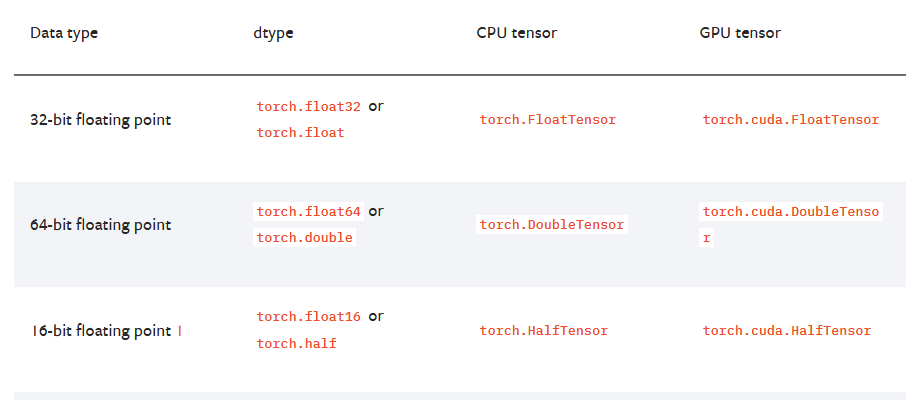

Data types such as float32, float16, float64, have to do with precision in computing, as float32 stores the values in 32 bits on the system memory, same with float16 and float 64. This means that float64 will be a more precise value than float32 and float32 will be a more precise value than float16.

## Tensor Attributes

The most common information or attributes we will need from tensors are -
1. Data Type - `tensor.dtype`
2. Shape - `tensor.shape`
3. Device - `tensor.device`



In [26]:
# Create a tensor to try retrieving the above 3 datatypes
some_tensor = torch.rand(3, 4)
some_tensor

tensor([[0.0406, 0.5355, 0.9655, 0.8769],
        [0.3825, 0.1307, 0.3053, 0.7396],
        [0.3638, 0.8811, 0.8542, 0.5881]])

In [27]:
# Find out details about the above created tensor
print(some_tensor.dtype) # Data Type
print(some_tensor.shape) # Shape
# print(some_tensor.size()) # also for Shape
print(some_tensor.device) # Device

torch.float32
torch.Size([3, 4])
cpu


From the above cell,
- `some_tensor.shape` is a variable
- `some_tensor.size()` is a function
- The default device for any tensor is the `cpu`.

## Manipulating Tensors (AKA Tensor Operations)

Tensor operations include -

- Addition
- Subtraction
- Multiplication (element-wise)
- Division
- Matrix Multiplication



In [28]:
# Create a tensor
tensor = torch.tensor([1, 2, 3])
tensor

tensor([1, 2, 3])

In [29]:
# Perform Addition
tensor + 10

tensor([11, 12, 13])

In [30]:
# Perform Multiplication
tensor * 10

tensor([10, 20, 30])

In [31]:
# Perform Subtraction
tensor - 10

tensor([-9, -8, -7])

In [32]:
# Perform Division
tensor / 2

tensor([0.5000, 1.0000, 1.5000])

### PyTorch in-built operator functions
- PyTorch also has operator functions for manipulation of tensors.
- Python's syntax and PyTorch's functions may be used interchangeably.

In [33]:
# Addition
torch.add(tensor, 10)

tensor([11, 12, 13])

In [34]:
# Multiplication
torch.multiply(tensor, 10)

tensor([10, 20, 30])

In [35]:
# Subtraction
torch.subtract(tensor, 10)

tensor([-9, -8, -7])

In [36]:
# Division
torch.divide(tensor, 10)

tensor([0.1000, 0.2000, 0.3000])

### Matrix Multiplication

- There are two main ways of multiplying tensors -
  1. Element-Wise Multiplication
  2. Matrix Multiplication (aka dot product)
- Matrix multiplication, also known as matrix product and the multiplication of two matrices, produces a single matrix. It is a type of binary operation. [*source*](https://byjus.com/maths/matrix-multiplication/#definition)
- Used to multiply two tensors to each other and produce another tensor.

Read more about matrix multiplication [*here*](https://www.mathsisfun.com/algebra/matrix-multiplying.html)

<!-- Also, note that for matrix multiplication to be succesful, both the tensors need to be of the same shape / size. (eg, 3x3 can only be matrix-multiplied by 3x3)  -->

There are two main rules to follow, for a Matrix Multiplication to be successful -
1. The **inner dimensions** must match
  - `(3, 2) @ (3, 2)` WON'T WORK
  - `(2, 3) @ (3, 2)` WILL WORK
  - `(3, 2) @ (2, 3)` WILL WORK
2. The resulting matrix has the shape of the **outer dimensions**.
  - `(2, 3) @ (3, 2)` => `(2, 2)`
  - (and same for reverse)


In [37]:
# Element wise multilpication
tensor * tensor

tensor([1, 4, 9])

In [38]:
# Matrix Multiplication
torch.matmul(tensor, tensor)

tensor(14)

- Note that, if PyTorch has a method already implemented as a function, (for example multiplication, or addition), then it is typically faster than its python-syntax counterpart.


#### Proving that `torch.matmul()` is faster than manually multiplying tensors

In [39]:
# Matrix multiplication using a for loop
%%time
value = 0
for i in range(len(tensor)):
  value += tensor[i] * tensor[i]
print(value)

tensor(14)
CPU times: user 1.87 ms, sys: 0 ns, total: 1.87 ms
Wall time: 4.6 ms


In [40]:
# Matrix multiplication using torch.matmul function
%%time
torch.matmul(tensor, tensor)

CPU times: user 25 µs, sys: 4 µs, total: 29 µs
Wall time: 31 µs


tensor(14)

- As we can see, `torch.matmul()` is obviously faster than manually multiplying using a `for loop`.

#### Dealing with tensor shape errors


In [41]:
# Creating a shape error
tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]])

tensor_B = torch.tensor([[7, 10],
                         [8, 11],
                         [9, 12]])

# torch.mm(tensor_A, tensor_B) # mm is the same as matmul alias for writing less code.

- To fix the tensor shape issue, we can manipulate the shape of one of the tensors using the transpose method. (`.T`)
- A **transpose** switches the axes or dimensions of a given tensor

In [42]:
# Transposing tensor_B
tensor_B.T

tensor([[ 7,  8,  9],
        [10, 11, 12]])

In [43]:
# Multiplying tensor_A and tensor_B.T
torch.mm(tensor_A, tensor_B.T)

tensor([[ 27,  30,  33],
        [ 61,  68,  75],
        [ 95, 106, 117]])

- As we can see from the above code sell, multyplying tensor_A (3,2) by tensor_B.T (2,3), which is transposed, we get no errors.

## Tensor Aggregation

- Finding the min, max, mean, sum, etc.

In [44]:
# Create a tensor
x = torch.arange(0, 100, 10)
x

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [45]:
# Finding the min
torch.min(x), x.min()

(tensor(0), tensor(0))

In [46]:
# Finding the max
torch.max(x), x.max()

(tensor(90), tensor(90))

In [47]:
# Finding the mean / average
torch.mean(x.type(torch.float32)), x.type(torch.float32).mean()

(tensor(45.), tensor(45.))

- While finding the mean of any tensor, it requires the data type to be float32. Thus changing the data type of the tensor.

In [48]:
# Finding the sum
torch.sum(x), x.sum()

(tensor(450), tensor(450))

### Finding the Positional min and max
- Positional Min / Max gives out the position of the maximum or minimum value.

In [49]:
x

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [50]:
# Finding positional max value
torch.argmax(x), x.argmax()

(tensor(9), tensor(9))

In [51]:
# Finding positional min value
torch.argmin(x), x.argmin()

(tensor(0), tensor(0))

## Reshaping, Stacking, Squeezing, and Un-Squeezing Tensors

- Reshaping - Reshaps an input tensor to a defined shape
- View - Return a view of an input tensor of certain shape, but keep the same memory as the original tensor
- Stacking - Combine multiple tensors on top of each other - vstack, side-by-side, or hstack.
- Squeeze - remove all `1` dimensions from a tensor.
- Un-Squeeze - adds a `1` dimension to a target tensor.
- Permuter - Return a view of the input with dimensions permuted (swapped) in a certain way.

In [52]:
# Creating a tensor
x = torch.arange(1., 11.)
x, x.shape

(tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]), torch.Size([10]))

In [53]:
# Reshape - add an extra dimension
x_reshaped = x.reshape(1, 10)
x_reshaped, x_reshaped.shape

(tensor([[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]]),
 torch.Size([1, 10]))

In [54]:
# View - change the view
z = x.view(1, 10)
z, z.shape

(tensor([[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]]),
 torch.Size([1, 10]))

- Returns a new tensor with the same data as the `self` tensor but of a different `shape`.

In [55]:
# Stack - stack tensors on top of each other.
x_vertical_stacked = torch.stack([x, x, x], dim=0)
x_horizontal_stacked = torch.stack([x, x, x], dim=1)

x_vertical_stacked, x_horizontal_stacked

(tensor([[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
         [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
         [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]]),
 tensor([[ 1.,  1.,  1.],
         [ 2.,  2.,  2.],
         [ 3.,  3.,  3.],
         [ 4.,  4.,  4.],
         [ 5.,  5.,  5.],
         [ 6.,  6.,  6.],
         [ 7.,  7.,  7.],
         [ 8.,  8.,  8.],
         [ 9.,  9.,  9.],
         [10., 10., 10.]]))

In [56]:
# Squeeze - removes all single dimensions from a tensor.
x_squeezed = x_reshaped.squeeze()

x_reshaped, x_reshaped.shape, x_squeezed, x_squeezed.shape

(tensor([[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]]),
 torch.Size([1, 10]),
 tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 torch.Size([10]))

In [57]:
# Unsqueeze - adds a single dimension to a target tensor at the specified dimension.
x_unsqueezed = x_squeezed.unsqueeze(dim=1)

x_squeezed, x_squeezed.shape, x_unsqueezed, x_unsqueezed.shape

(tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 torch.Size([10]),
 tensor([[ 1.],
         [ 2.],
         [ 3.],
         [ 4.],
         [ 5.],
         [ 6.],
         [ 7.],
         [ 8.],
         [ 9.],
         [10.]]),
 torch.Size([10, 1]))

In [58]:
# Permute - Re-arranged the dimensions of a target tensor in a specified order
x_original = torch.rand(size=(244, 244, 3))
x_original.permute(2, 0, 1) # positional integers...

tensor([[[0.3136, 0.8038, 0.9027,  ..., 0.7628, 0.1760, 0.3079],
         [0.8685, 0.9311, 0.7414,  ..., 0.2147, 0.6901, 0.2641],
         [0.9384, 0.4133, 0.9236,  ..., 0.8716, 0.7491, 0.7163],
         ...,
         [0.1932, 0.2817, 0.5759,  ..., 0.5741, 0.9446, 0.6175],
         [0.5765, 0.3608, 0.6487,  ..., 0.4470, 0.3457, 0.5319],
         [0.0213, 0.8021, 0.4093,  ..., 0.8112, 0.2339, 0.9329]],

        [[0.2207, 0.1396, 0.7438,  ..., 0.3755, 0.1624, 0.5820],
         [0.1820, 0.6364, 0.5343,  ..., 0.2787, 0.2518, 0.1292],
         [0.5749, 0.8398, 0.2750,  ..., 0.7098, 0.9724, 0.9027],
         ...,
         [0.5302, 0.6180, 0.5070,  ..., 0.2866, 0.8394, 0.6481],
         [0.4780, 0.4785, 0.2687,  ..., 0.0282, 0.3050, 0.6583],
         [0.8826, 0.7960, 0.1298,  ..., 0.4817, 0.4520, 0.6205]],

        [[0.5802, 0.4623, 0.6864,  ..., 0.7457, 0.0649, 0.8584],
         [0.4413, 0.7385, 0.6222,  ..., 0.0150, 0.9499, 0.1235],
         [0.2740, 0.5094, 0.9406,  ..., 0.5974, 0.7013, 0.

## Indexing (Selecting Data from Tensors)

- Indexing with PyTorch is similar to indexing with NumPy.

In [59]:
# Create a tensor
x = torch.arange(1, 10).reshape(1, 3, 3)
x, x.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

In [60]:
# Indexing New Tensor
x[0]

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [61]:
x[0, 1], x[0][1]

(tensor([4, 5, 6]), tensor([4, 5, 6]))

In [62]:
x[0, 0, 2], x[0][0][2]

(tensor(3), tensor(3))

In [63]:
# Can also use ":" to select "all" of a target dimension
x[:, 0]

tensor([[1, 2, 3]])

In [64]:
# Get all values of 0th and 1st dimensions but only index 1 of 2nd dimension
x[:, :, 1]

tensor([[2, 5, 8]])

In [65]:
# Get all values of the 0 dimension but only the 1 index of the 1st and 2nd dimension
x[:, 1, 1]

tensor([5])

In [66]:
# Get index 0 of 0th and 1st dimension, and all values of 2nd dimension
x[0, 0, :]

tensor([1, 2, 3])

# PyTorch Tensors & NumPy
- Numpy is a popular scientific python numerical cumputing library.
- And because of this, PyTorch has functionality to interarct with it.
- To convert data from NumPy (`ndarray`) too data which can work with PyTorch, -> `torch.from_numpy(ndarray)`. Which changes the data into a pytorch tensor.
- PyTorch Tensor -> Numpy Array -> `torch.Tensor.numpy()`

In [67]:
# NumPy array to PyTorch tensor
array = np.arange(1.0, 11.0)
tensor = torch.from_numpy(array)#.type(torch.float32)

array, tensor

(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.], dtype=torch.float64))

- Note that the data type after converting the `ndarray` to a `torch.tensor`, the data type is `torch.float64`.
- That is because NumPy's default data type is `float64`, whereas PyTorch's default data type is `float32`.
- Therefore, PyTorch will reflect NumPy's default data type, unless specified otherwise.

In [68]:
# Changing the value of array, to see if it also affects the tensor.
array = array + 1
tensor, array

(tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.], dtype=torch.float64),
 array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]))

In [69]:
# Tensor to NumPy
tensor = torch.rand(1, 3, 3)
array = tensor.numpy()

tensor, array

(tensor([[[0.9829, 0.0487, 0.0335],
          [0.9894, 0.4139, 0.1726],
          [0.8577, 0.5255, 0.1048]]]),
 array([[[0.9829421 , 0.04873502, 0.03351963],
         [0.9893952 , 0.41391778, 0.17261833],
         [0.85769045, 0.52545977, 0.10477674]]], dtype=float32))

- As visible, NumPy also preserves PyTorch's default data type.

In [70]:
# Changing the value of tensor, to see if it also affects the array.
tensor += 1

array, tensor

(array([[[1.9829421, 1.048735 , 1.0335196],
         [1.9893951, 1.4139178, 1.1726184],
         [1.8576905, 1.5254598, 1.1047767]]], dtype=float32),
 tensor([[[1.9829, 1.0487, 1.0335],
          [1.9894, 1.4139, 1.1726],
          [1.8577, 1.5255, 1.1048]]]))

- As visible, changing the value of the tensor also changes the value of the numpy array. This is the total opposite of the previous scenario.

# Reproducibility in PyTorch

- Trying to take the random out of random.
- In short, how a neural network learns is start with random numbers, perform tensor operations, update random numbers to try and make them better representations of the data -> again -> again -> again...
- To reduce the randomness in neural networks in PyTorch, comes the concept of **random seed**.
- What the random seed does is "flavour" the randomness.

In [71]:
# Create two random tensors and compare them to see if any of the values are equal. (which is highly unlikely)

random_a = torch.rand(3, 4)
random_b = torch.rand(3, 4)

print(random_a)
print(random_b)
print(random_a == random_b)

tensor([[0.2754, 0.7381, 0.5829, 0.6039],
        [0.4896, 0.6854, 0.6609, 0.9534],
        [0.8540, 0.3560, 0.7108, 0.9771]])
tensor([[0.4193, 0.9689, 0.6983, 0.6671],
        [0.9280, 0.7334, 0.6585, 0.8993],
        [0.7870, 0.5158, 0.3709, 0.1840]])
tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])


In [72]:
# Making random but reproducible tensors.

RANDOM_SEED = 42

torch.manual_seed(RANDOM_SEED)
random_c = torch.rand(3, 4)

torch.manual_seed(RANDOM_SEED)
random_d = torch.rand(3, 4)

print(random_c)
print(random_d)
print(random_c == random_d)

tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])


# Running Tensors and PyTorch Objects on the GPU

- GPUs can work on numbers faster, using CUDA + NVIDIA hardware + PyTorch Working behind the scenes to make everything good.
- How to get a GPU - Use Google Colab. Or get Colab Pro for better and faster hardware.  Or use a local gpu, or use cloud providers such as GCP.

In [73]:
# Checking GPU access in google colab
torch.cuda.is_available()

True

In [74]:
# Setup device agnostic code.
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

- For PyTorch, since its capable of running compute oon the GPU or CPU, its best practice to setup device agnostic code.

## Putting Tensors and Models on the GPU.

- We may want to do this because running  tensors or models on the GPU results in faster computation.

In [76]:
# create a tensor (default on the CPU unless specified)

tensor = torch.tensor([1, 2, 3], device="cpu")

# Tensor not on GPU
print(tensor, tensor.device)

tensor([1, 2, 3]) cpu


In [77]:
# Moving tensor to GPU if it is available.
tensor_on_gpu = tensor.to(device)
tensor_on_gpu

tensor([1, 2, 3], device='cuda:0')

- `cuda:0` here `0` is the index of the GPU we're using.

In [80]:
# Moving tensor back to the CPU.
tensor_back_on_cpu = tensor_on_gpu.cpu()
tensor_back_on_cpu.device

device(type='cpu')